In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
from scipy.stats import expon as exp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import sklearn.model_selection

In [2]:
mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [3]:
mnist_df=pd.DataFrame(mnist_data)
mnist_df["y"]=mnist_label
mnist_df


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [4]:
df_new=pd.DataFrame()
for i in range(0,10):
    temp=mnist_df[mnist_df['y']==i].iloc[0:3000]
    df_new=df_new.append(temp,ignore_index=True)
df_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
29996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
29997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [5]:
x=df_new.iloc[:,:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x=x.apply(lambda x:((x)/255.0).astype(np.float128))

In [7]:
y=df_new['y']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29995    9.0
29996    9.0
29997    9.0
29998    9.0
29999    9.0
Name: y, Length: 30000, dtype: float64

In [8]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,train_size=0.8,random_state=20)

In [9]:
mean = np.zeros((10,x.shape[1]),dtype=np.float128)
mean.shape

(10, 784)

In [10]:
import sys
temp=x_train.groupby([y_train]).mean()
temp=temp.replace([0],1)
temp

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
y,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.0,1.0,1.0
1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.0,1.0,1.0
2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.0,1.0,1.0
3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.0,1.0,1.0
4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.0,1.0,1.0
5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.0,1.0,1.0
6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.0,1.0,1.0
7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.007930,0.003561,0.000974,0.000761,0.000725,0.0001,1.0,1.0,1.0,1.0
8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.0,1.0,1.0


In [11]:
mean=temp.to_numpy()
mean.shape

(10, 784)

In [12]:
mean

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [13]:
def pdf(data):
   return exp.pdf(data)


In [14]:
priors=np.zeros(10,dtype=np.float128)

In [15]:
y_count = y_train.value_counts(sort=False)
y_count

3.0    2388
6.0    2405
2.0    2391
9.0    2412
4.0    2379
0.0    2394
8.0    2406
1.0    2399
5.0    2399
7.0    2427
Name: y, dtype: int64

In [16]:
yc=np.zeros(10,dtype=np.float128)
for i in range(0,10):
  yc[i]=y_count[i]
yc

array([2394., 2399., 2391., 2388., 2379., 2399., 2405., 2427., 2406.,
       2412.], dtype=float128)

In [17]:
for i in range(0, 10):
  priors[i] = yc[i]/y_train.shape[0]
priors

array([0.09975   , 0.09995833, 0.099625  , 0.0995    , 0.099125  ,
       0.09995833, 0.10020833, 0.101125  , 0.10025   , 0.1005    ],
      dtype=float128)

In [18]:
y_pred=np.zeros(y_test.shape[0])
for i in range(0,x_test.shape[0]):
    f=np.zeros(10,dtype=np.float128)
    for j in range(0,10):
        data=np.dot(x_test.iloc[i],mean[j])
        f[j]=np.sum(np.log(1/mean[j])-(1/mean[j])*x_test.iloc[i]) + np.log(priors[j])
    y_pred[i]=np.argmax(f)

In [19]:
acc= sklearn.metrics.accuracy_score(y_test,y_pred)
acc

0.6733333333333333

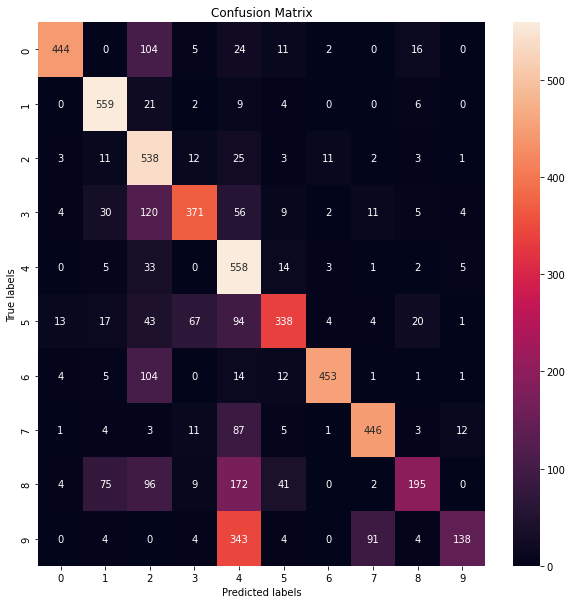

In [20]:
confusionMat=sklearn.metrics.confusion_matrix(y_test,y_pred)
confusionMat
ax= plt.subplots(figsize=(10,10))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 